In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import io
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
#plots accuracy, returns None
def plot_accuracy(x, y, name):
    plt.plot(x, y, 'bo')
    plt.xlabel('num_samples')
    plt.ylabel('accuracy')
    plt.title(name)
    plt.show()

In [ ]:
def train_svm(samples, clf, train_set, train_y, valid_set, valid_y, name):
    valid_error, train_error = train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y, name)
    plot_accuracy(samples, train_error, name + ' Training_Accuracy')
    plot_accuracy(samples, valid_error, name + ' Validation_Accuracy')
    return valid_error, train_error

In [5]:
# Purpose: Trains SVM
# Params:
# Return: list of valid_errors from each experiment
#REMEMBER TO UPDATE THE RETURN VALID_ERROR, TRAIN_ERROR, need to do train_svm[0] to get valid_error
#poor naming for what's returned, says error but should be score
def train_svm_no_plot(samples, clf, train_set, train_y, valid_set, valid_y, name):
    train_error = list()
    valid_error = list()
    for sample_size in samples:
        # print("Sample_size: " + str(sample_size))
        clf.fit(train_set[:sample_size], train_y[:sample_size])
        train_score = clf.score(train_set, train_y)
        train_error.append(train_score)
        # print("train_score: " + str(train_score))
        valid_score = clf.score(valid_set, valid_y)
        valid_error.append(valid_score)
        # print("valid_score: " + str(valid_score))
    return valid_error, train_error

In [ ]:
#Splits data set into training and validation set of given size
#SHould this return a 2-d numpy array for labels? or keep it at one? clf requires 1-d, but concatenate requires 2.
def split_train_and_valid_sets(data, size):
    np.random.shuffle(data)
    shape = data.shape[0] 
    valid_set = data[:size, :-1] 
    valid_y = data[:size, -1] 
    train_set = data[size:, :-1] 
    train_y = data[size:, -1]
    return shape, valid_set, valid_y, train_set, train_y

In [ ]:
# -----------MNIST SET-------- (sklearn fn)
mnist_dict = io.loadmat('mnist/train.mat')
mnist_trainX = mnist_dict['trainX']



In [15]:
mnist_train_set, mnist_valid_set, mnist_train_y, mnist_valid_y = train_test_split(mnist_trainX[:, :-1], mnist_trainX[:, -1], test_size=10000, random_state=42)
print('mnist_train_set ' + str(mnist_train_set.shape))
print('mnist_valid_set ' + str(mnist_valid_set.shape))
print('mnist_train_y ' + str(mnist_train_y.shape))
print('mnist_valid_y ' + str(mnist_valid_y.shape))

In [13]:
# -----------CIFAR-10 SET -------- (sklearn fn)
cifar_dict = sp.io.loadmat('cifar/train.mat')
cifar_trainX = cifar_dict['trainX']


cifar_train_set (45000, 3072)
cifar_valid_set (5000, 3072)
cifar_train_y (45000,)
cifar_valid_y (5000,)


In [8]:
cifar_train_set, cifar_valid_set, cifar_train_y, cifar_valid_y = train_test_split(cifar_trainX[:, :-1], cifar_trainX[:, -1], test_size=5000, random_state=42)


In [ ]:
print('cifar_train_set ' + str(cifar_train_set.shape))
print('cifar_valid_set ' + str(cifar_valid_set.shape))
print('cifar_train_y ' + str(cifar_train_y.shape))
print('cifar_valid_y ' + str(cifar_valid_y.shape))

In [8]:
# --------------SPAM DataSet (sklearn fn)----------------
spam_dict = sp.io.loadmat('spam/spam_data.mat')
spam_trainX= spam_dict['training_data']
spam_labels = spam_dict['training_labels']

(5172, 32) (5172, 1)
(4138,)


In [21]:


spam_train_set, spam_valid_set, spam_train_y, spam_valid_y = train_test_split(spam_trainX, spam_labels.T, test_size=0.2, random_state=42)


spam_train_set (4137, 32)
spam_valid_set (1035, 32)
spam_train_y (4137, 1)
spam_valid_y (1035, 1)


In [ ]:
print('spam_train_set ' + str(spam_train_set.shape))
print('spam_valid_set ' + str(spam_valid_set.shape))
print('spam_train_y ' + str(spam_train_y.shape))
print('spam_valid_y ' + str(spam_valid_y.shape))

Training MNIST
Sample_size: 100


train_score: 0.75428


valid_score: 0.7525
Sample_size: 200


train_score: 0.81828


valid_score: 0.8129
Sample_size: 500


train_score: 0.86824


valid_score: 0.8552
Sample_size: 1000


train_score: 0.88658


valid_score: 0.8765
Sample_size: 2000


train_score: 0.89402


valid_score: 0.8836
Sample_size: 5000


train_score: 0.91246


valid_score: 0.8949
Sample_size: 10000


train_score: 0.92572


valid_score: 0.9033


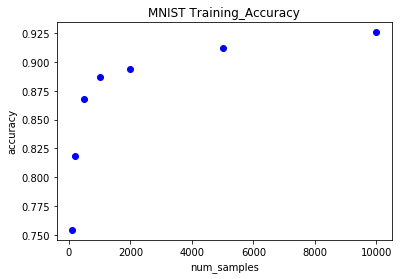

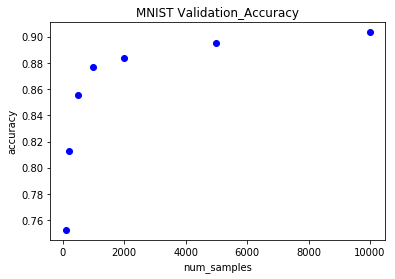

In [10]:
# *********************PROBLEM 2 --> TRAIN DATA ***********************

# ----------TRAIN MNIST DATA------------#
print("Training MNIST")
clf_mnist = SVC(kernel="linear")
experiments = [100, 200, 500, 1000, 2000, 5000, 10000]
# expect between 70-90% accuracy
valid_error, train_error = train_svm(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y,
          'MNIST')
# print('Valid_error is: ' + str(valid_error))
# print('Train_error is: ' + str(train_error))

Training CIFAR
Sample_size: 100


train_score: 0.207666666667


valid_score: 0.2076
Sample_size: 200


train_score: 0.250488888889


valid_score: 0.2488
Sample_size: 500


train_score: 0.291533333333


valid_score: 0.2804
Sample_size: 1000


train_score: 0.3008


valid_score: 0.2766
Sample_size: 2000


train_score: 0.326355555556


valid_score: 0.28
Sample_size: 5000


train_score: 0.375422222222


valid_score: 0.2894


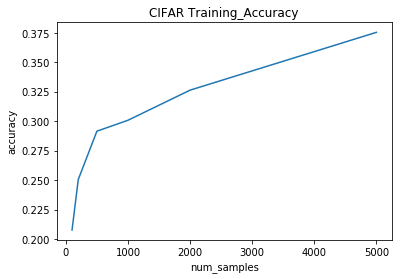

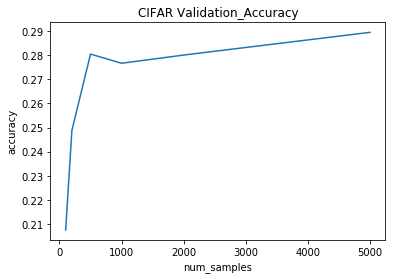

Valid_error is [0.20760000000000001, 0.24879999999999999, 0.28039999999999998, 0.27660000000000001, 0.28000000000000003, 0.28939999999999999]
Train_error is: [0.20766666666666667, 0.25048888888888887, 0.29153333333333331, 0.30080000000000001, 0.32635555555555557, 0.37542222222222221]


In [16]:
# -----------TRAIN CIFAR DATA-----------#
print("Training CIFAR")
clf_cifar = SVC(kernel='linear')
experiments = [100, 200, 500, 1000, 2000, 5000]
# expect between 25-35% accuracy
valid_error, train_error = train_svm(experiments, clf_cifar, cifar_train_set, cifar_train_y, cifar_valid_set, cifar_valid_y, 'CIFAR')
print('Valid_error is ' + str(valid_error))
print('Train_error is: ' + str(train_error))

Training SPAM
Sample_size: 100
train_score: 0.781295311745
valid_score: 0.771760154739
Sample_size: 200
train_score: 0.801594973417
valid_score: 0.791102514507
Sample_size: 500
train_score: 0.793136781054
valid_score: 0.785299806576
Sample_size: 1000


train_score: 0.805219913001
valid_score: 0.788201160542
Sample_size: 2000


train_score: 0.802561623973
valid_score: 0.796905222437
Sample_size: 4137


train_score: 0.81029482842
valid_score: 0.797872340426


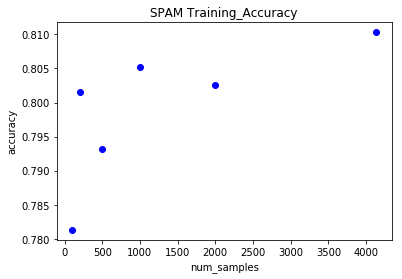

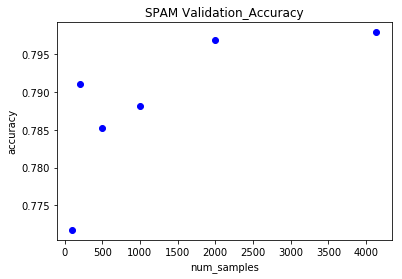

Valid_error is: [0.77176015473887816, 0.79110251450676983, 0.7852998065764023, 0.78820116054158607, 0.79690522243713735, 0.7978723404255319]
Train_error is: [0.78129531174480427, 0.80159497341710972, 0.79313678105364915, 0.80521991300145002, 0.80256162397293374, 0.81029482841952638]


In [20]:
# ----------TRAIN SPAM DATA -------------
print("Training SPAM")
clf_spam = SVC(kernel="linear")
experiments = [100, 200, 500, 1000, 2000, 4137]
# expect between 70-90% accuracy
valid_error, train_error = train_svm(experiments, clf_spam, spam_train_set, spam_train_y, spam_valid_set, spam_valid_y, 'SPAM')
print('Valid_error is: ' + str(valid_error))
print('Train_error is: ' + str(train_error))

In [ ]:
# ************************** PROBLEM 3: BEST C Value ********************************
from sklearn.svm import SVC
C_range = [.01, .001, .0001, .00001, .000001, .0000001, .00000001, .000000001]
experiments = [10000]
for C in C_range:
    clf_mnist = SVC(kernel="linear", C=C)
    scores = train_svm_no_plot(experiments, clf_mnist, mnist_train_set, mnist_train_y, mnist_valid_set, mnist_valid_y, 'MNIST')
    print('C value: ' + str(C))
    print('valid_score ' + str(scores[0]))

C value: 0.001
valid_score [0.1134]


C value: 0.0001
valid_score [0.1134]


C value: 1e-05
valid_score [0.1134]


In [22]:
# ************************** PROBLEM 3: BEST C Value ********************************
#got this from http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html #
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range, kernel=('linear', 'rbf'))
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], }
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(mnist_train_set, mnist_train_y)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
# ************************** PROBLEM 4: K-FOLD ********************************
def k_fold_split(data, clf, k, name):
    np.random.shuffle(data)
    valid_errors = list()
    copy_data = data[:, :]
    for i in range(k):
        if is_divisible_by_k(copy_data, k):
            k_arrays = np.split(copy_data, k)
        else:
            divisible_data, extra_data = preprocess_data(copy_data, k)
            k_arrays = np.split(divisible_data, k)
            print("last split shape: " + str(k_arrays[-1].shape))
            print("extra_data shape: " + str(extra_data.shape))
            np.vstack((k_arrays[-1], extra_data)) 
        valid_set = k_arrays.pop(i)
        print("valid_set shape is: " + str(valid_set.shape))
        valid_data = valid_set[:, :-1]
        print("valid_data shape is: " + str(valid_data.shape))
        valid_y = valid_set[:, -1]
        print("valid_y shape is: " + str(valid_y.shape))
        print('num lists to concatenate ' + str(len(k_arrays)))
        train_set = np.vstack(k_arrays)
        print("train_set shape is: " + str(train_set.shape))
        train_data = train_set[:, :-1]
        print("train_data shape is: " + str(train_data.shape))
        train_y = train_set[:, -1]
        print("train_y shape is: " + str(train_y.shape))
        valid_errors.append(train_svm_no_plot([train_data.shape[0]], clf, train_data, train_y, valid_data, valid_y, name)[0])
    valid_score = np.sum(valid_errors)/k
    print("Valid Score is:")
    print(valid_score)
    return valid_score

In [33]:
def preprocess_data(data, k):
    print('og data shape: ' + str(data.shape))
    remainder = data.shape[0] % k
    extra_samples = data[-remainder:, :]
    print("extra_samples " + str(extra_samples.shape))
    # two_dim_extras = np.array([extra_samples])
    # transposed_extras = two_dim_extras.T
    # print('np array extras: ' + str(two_dim_extras.shape))
    divisible_samples = data[:-remainder, :]
    print('divisible_samples: ' + str(divisible_samples.shape))
    return divisible_samples, extra_samples

In [34]:
def is_divisible_by_k(data, k):
    if data.shape[0] % k == 0:
        return True
    return False

In [37]:
print("Running KFOLD")
clf_spam = SVC(C = 0.01)
# both arrays need to be 2-dimensional
two_dim_label = np.array([spam_train_y])
transposed_labels = two_dim_label.T
print('training set data: ' + str(spam_train_set.shape))
print('transposed_labels ' + str(transposed_labels.shape))
spam_training = np.hstack((spam_train_set, transposed_labels))
print('spam_concatenated: ' + str(spam_training.shape))
k_fold_split(spam_training, clf_spam, 5, 'SPAM')

Running KFOLD
training set data: (4138, 32)
transposed_labels (4138, 1)
spam_concatenated: (4138, 33)
og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
Sample_size: 3308


train_score: 0.826481257557
valid_score: 0.837968561064
og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
Sample_size: 3308


train_score: 0.831620314389
valid_score: 0.828295042322
og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
Sample_size: 3308


train_score: 0.827992744861
valid_score: 0.819830713422
og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
Sample_size: 3308


train_score: 0.834643288996
valid_score: 0.800483675937
og data shape: (4138, 33)
extra_samples (3, 33)
divisible_samples: (4135, 33)
last split shape: (827, 33)
extra_data shape: (3, 33)
valid_set shape is: (827, 33)
valid_data shape is: (827, 32)
valid_y shape is: (827,)
num lists to concatenate 4
train_set shape is: (3308, 33)
train_data shape is: (3308, 32)
train_y shape is: (3308,)
Sample_size: 3308


train_score: 0.834945586457
valid_score: 0.799274486094
Valid Score is:
0.817170495768


0.8171704957678354

In [ ]:
# ****************** PROBLEM 5: KAGGLE COMPETITION ***************
# from sklearn import svm
# #create four classifers
# #in the constructor for the svc you need to make sure it's a binary classifier
# clf1 = svm.SVC()
# clf2 = svm.SVC()
# clf3 = svm.SVC()
# clf4 = svm.SVC()
# 
# #add extra models to increase the hamming distance, get more room for errors
# 
# #fit the data X to the labels yi where yi = {0,1}
# #binary classifer
# #this comes after you build y1, y2, y3, y4
# clf1.fit(X, y1)
# clf2.fit(X, y2)
# clf3.fit(X, y3)
# clf4.fit(X, y4)
#